## **CLEANING OF DATASET**


This dataset includes several months of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day. Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count.
#Dataset Link:
https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download&select=CAvideos.csv


### **I. IMPORT THE NECESSARY LIBRARIES**

In [ ]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### **II. Read the data and find summary statistics**

Read your dataset. You can use the code below or you can mount your gdrive in case your csv file/ dataset is uploaded in gdrive.

Get the info of your dataset (this will show the number of columns, the number of non null data and the datatype of your dataset)

In [ ]:
data = pd.read_csv('CAvideos.csv', on_bad_lines='skip')

In [ ]:
data.shape[1], data.isna().sum()

(16,
 video_id                     0
 trending_date                0
 title                        0
 channel_title                0
 category_id                  0
 publish_time                 0
 tags                         0
 views                        0
 likes                        0
 dislikes                     0
 comment_count                0
 thumbnail_link               0
 comments_disabled            0
 ratings_disabled             0
 video_error_or_removed       0
 description               1296
 dtype: int64)

Get the first five and last five of your dataset

In [ ]:
data.head(5), data.tail(5)

(      video_id trending_date  \
 0  n1WpP7iowLc      17.14.11   
 1  0dBIkQ4Mz1M      17.14.11   
 2  5qpjK5DgCt4      17.14.11   
 3  d380meD0W0M      17.14.11   
 4  2Vv-BfVoq4g      17.14.11   
 
                                                title channel_title  \
 0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
 1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
 2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
 3                           I Dare You: GOING BALD!?      nigahiga   
 4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   
 
    category_id              publish_time  \
 0           10  2017-11-10T17:00:03.000Z   
 1           23  2017-11-13T17:00:00.000Z   
 2           23  2017-11-12T19:05:24.000Z   
 3           24  2017-11-12T18:01:41.000Z   
 4           10  2017-11-09T11:04:14.000Z   
 
                                                 tags     views    likes  \
 0  Eminem|"Walk"|"On"|"

Get the sumarry statistics of your dataset to show the the total count, mean, standard deviation, min and max value, and percentiles of each column of your dataset

In [ ]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


### **III. Visualising and analysing missing values**

Visualize the missing values/data in your dataset to see how many data and percentage of data are missing in each column of your dataset

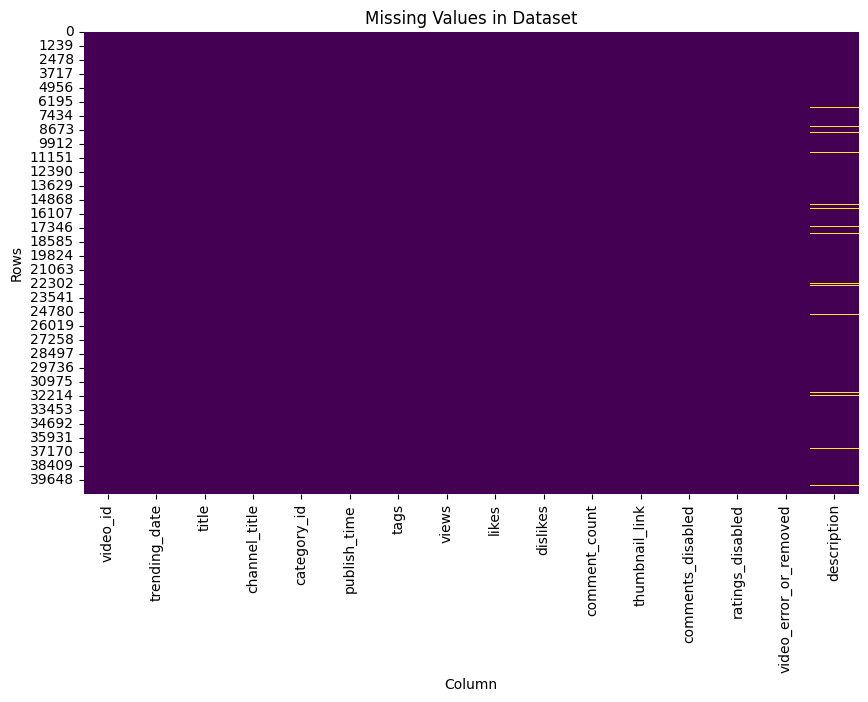

Missing Values; 
                        Total Missing  Percentage
video_id                            0    0.000000
trending_date                       0    0.000000
title                               0    0.000000
channel_title                       0    0.000000
category_id                         0    0.000000
publish_time                        0    0.000000
tags                                0    0.000000
views                               0    0.000000
likes                               0    0.000000
dislikes                            0    0.000000
comment_count                       0    0.000000
thumbnail_link                      0    0.000000
comments_disabled                   0    0.000000
ratings_disabled                    0    0.000000
video_error_or_removed              0    0.000000
description                      1296    3.170177


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.xlabel('Column')
plt.ylabel('Rows')
plt.show()

missing_data= data.isnull().sum()
percentage_missing= missing_data/len(data)*100

print('Missing Values; ')
print(pd.concat([missing_data, percentage_missing], axis=1, keys=['Total Missing', 'Percentage']))

In [ ]:
data.iloc[4956:6195].isnull().sum()

Series([], dtype: float64)

In [ ]:
data.iloc[10275:10960].isnull().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               29
dtype: int64

In [ ]:
data.iloc[21921:39645].isnull().sum()

Series([], dtype: float64)

In [ ]:
data.iloc[0:685].isnull().sum()

video_id                   0
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               17
dtype: int64

In [ ]:
data.iloc[21921:39645].isnull().sum()

Series([], dtype: float64)

Use a nullity matrix for your dataset for easy visualization of missing data.

<function matplotlib.pyplot.show(close=None, block=None)>

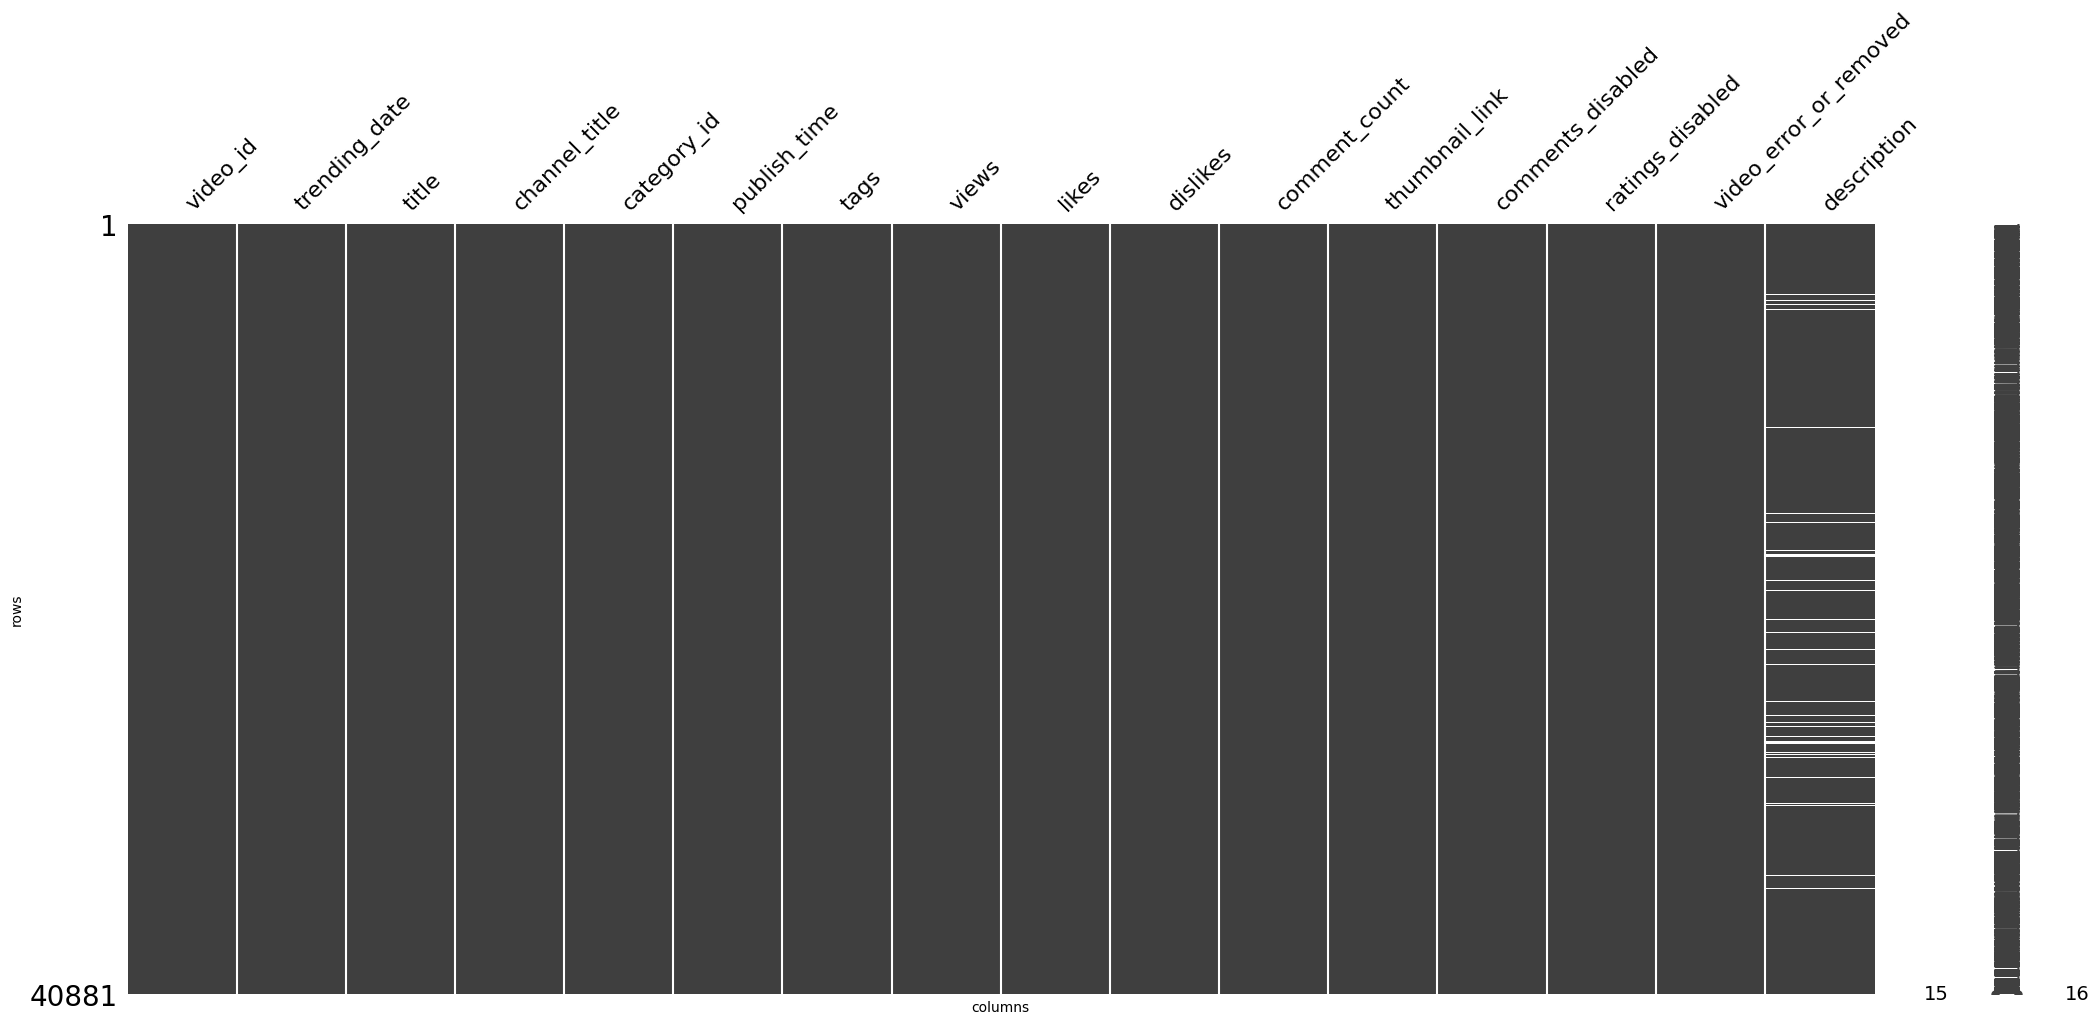

In [ ]:
msno.matrix(data)
plt.xlabel("columns")
plt.ylabel("rows")
plt.show

In [ ]:
condition = (data['category_id'] == 24)
missing_values_for_category_24 = data.loc[condition, 'description'].isnull().sum()
print(f"Number of missing values in 'description' for category_id 24: {missing_values_for_category_24}")

Number of missing values in 'description' for category_id 24: 278


In [ ]:
condition = (data['category_id'] == 10)
missing_values_for_category_10 = data.loc[condition, 'description'].isnull().sum()
print(f"Number of missing values in 'description' for category_id 10: {missing_values_for_category_10}")

Number of missing values in 'description' for category_id 10: 36


### **IV. Cleaning of dataset: Imputation of data to missing data**

In cleaning of your dataset, evaluate your dataset, identify what features will be drop or retain. Drop or delete columns with more than 80% of values missing.

Note: We cannot use feauters that are not in integer/float or numerical data type.

In [ ]:
#dropping or deleting of columns with 80% missing values
clean_data=data.dropna(axis=1,thresh=len(data)*0.8)

In [ ]:
#dropping or deleting columns that is unnecessary
clean_data1 = clean_data.drop(columns =['description', 'tags', 'thumbnail_link','video_id'])

After deleting the columns with 80% missing data. Impute data/value in the missing data of your dataset.

In [ ]:
clean_data2 = clean_data1.fillna("NaN")

After imputation of data, Check the completeness of your dataset by getting its info.

In [ ]:
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40881 non-null  object
 1   title                   40881 non-null  object
 2   channel_title           40881 non-null  object
 3   category_id             40881 non-null  int64 
 4   publish_time            40881 non-null  object
 5   views                   40881 non-null  int64 
 6   likes                   40881 non-null  int64 
 7   dislikes                40881 non-null  int64 
 8   comment_count           40881 non-null  int64 
 9   comments_disabled       40881 non-null  bool  
 10  ratings_disabled        40881 non-null  bool  
 11  video_error_or_removed  40881 non-null  bool  
dtypes: bool(3), int64(5), object(4)
memory usage: 2.9+ MB


Plot a correlation heatmap between all the numeric variables in your dataset using Seaborn's
sns.heatmap() function on the inter-feature correlation values in the dataset.

<ipython-input-125-dc14572abee2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Reds')


<Axes: >

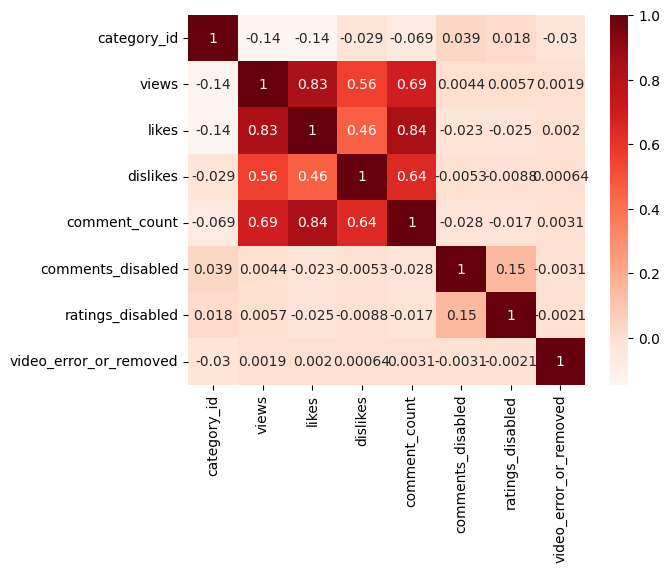

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')

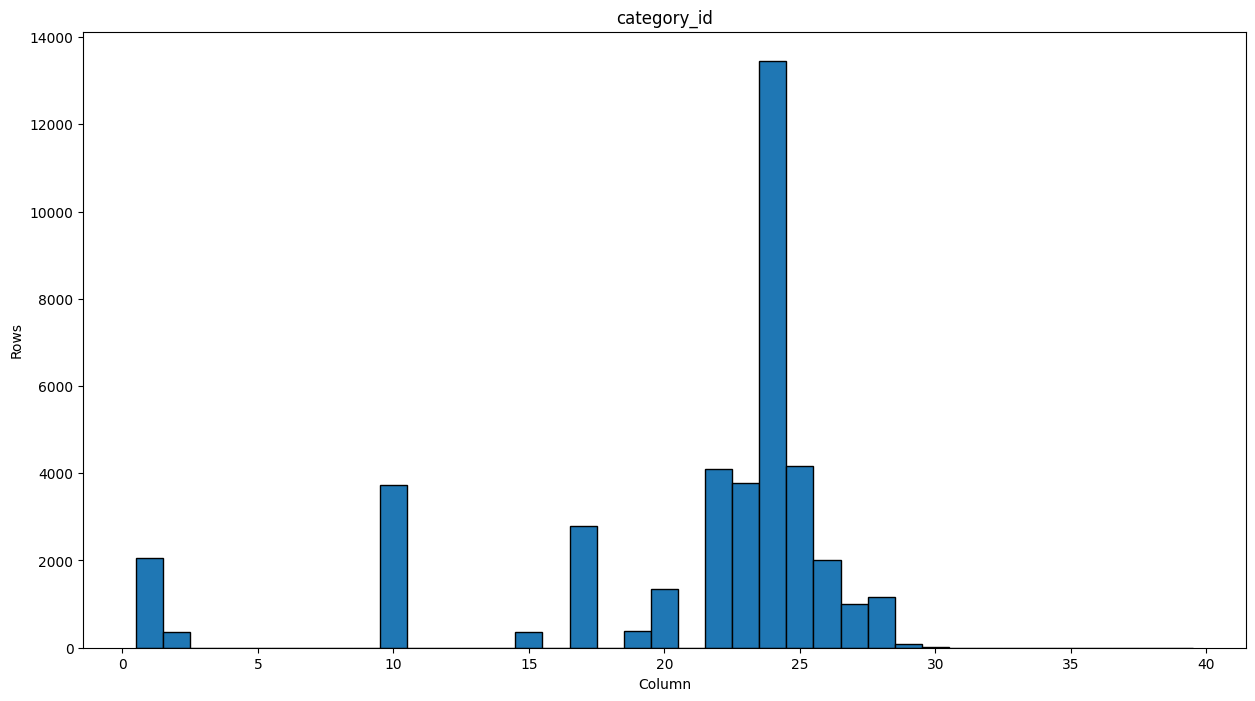

In [ ]:
plt.figure(figsize=(15, 8))
bins = range(1, 41)
plt.hist(clean_data2["category_id"], bins=bins, align='left', edgecolor='black')
plt.xlabel("Column")
plt.ylabel("Rows")
plt.title("category_id")
plt.show()

Based on the dataset provided, the majority of the missing values are from the column of description which has 1296 missing values. For the visualizing and analyzing missing values the heatmap shows concentration of missing values from specified ranges of rows like from row 4956 to 6195 where there are a total of 29 missing values. In addition, concentrations of missing values represented by yellow lines were only shown in the range of 0 to 39648, meaning that starting from 39645 to 40882(final row) concentrations of missing values are much lower when summed up compared to the rows that were included in the heatmap.

On the other hand, for a nullity matrix, the data shows a random distribution of missing values represented by white lines where some part in the matrix shows a little concentration of white lines meaning that there is a build up of missing values in that specific area. Furthermore, there is a slight build up of white lines in the middle which means missing values in those parts have a smaller gap compared to others .The correlation heatmap numeric values show strong correlation when it comes to views, likes, dislikes, and comment_count. Numerical values for every set in columns shows a repeating set of values suggesting connections between those sets are closer to one another. However, the category_id shows low correlation or no correlation at all when it comes to views, likes, dislikes and comment_counts. Same goes by on the comments_disabled, ratings_disabled and video_error_or_removed.

The histogram shows the distribution of data wherein the x-axis of the graph represents the "category_id", which appears to be a categorical variable that assigns unique IDs to different categories. The y-axis represents the number of rows in each category. In the graph, the most frequent category ID is 24, with approximately  around 13,000 rows. There are also several other categories with a significant number of rows, ranging from 2,000 to 6,000. The remaining categories have a smaller number of rows, with some categories having only a few rows. Category ID 24 is the more popular or has more items than other categories, it would naturally have a higher number of rows in the dataset. While , categories with fewer items or those that are less popular would have fewer rows in the dataset.

For the data cleaning unnecessary columns where removed these are: description, tags, and thumbnails. This column has a data of pure description regarding the video of  certain data, thumbnails for links and tags. The description and tags has unfamiliar characters that can be a hindrance to the data processing; it also has a combination of different data types like string, float, int and such, where it can add up to the difficulty of processing the data.

Different graphs used in this laboratory experiment show connections or correlation between the datasets. Unnecessary data were removed to lessen the difficulty of processing the data. Through this activity, our dataset underwent different processes and analysis journeys including the dropping of the unnecessary columns and imputing the missing values to maintain the data integrity. In addition, the output for every data processing was unpredictable because as we continuously run and observe the code the values will either increase very high or decrease very low. There is no constant number of missing values for this dataset. On the other hand,  the visualization of the data helps us gain  a clearer understanding of the dataset's patterns and relationships. In conclusion, This process enhances the dataset's utility for predictive modeling and ensures that it aligns with the specific objectives of the analysis.






Save and export your clean dataset.

In [ ]:
clean_data2.to_csv('CAvideos_cleaned_data.csv', index=False)